In [19]:
####### os, pickle
import os
import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib import pyplot as plt
#import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
#from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


#from funciones import* 
os.chdir('../')
from funciones import metrics
from Carga_dataset import data,df,df0
os.chdir('./Modelos')

from imblearn.over_sampling import SMOTE 
from collections import Counter

import xgboost as xgb
from xgboost import XGBClassifier

In [10]:
# from main import *

In [11]:
os.getcwd()

'c:\\Users\\metal\\Trabajos Bootcamp\\Proyecto Final\\juanito_v2.0\\Modelos'

In [3]:
#os.chdir(r'Datos')
fh5=open('..\Datos\df_PCA10k_train_test.pkl','rb')
train_test=pickle.load(fh5)
fh5.close()


X = train_test['X']
y = train_test['y']

print('X:',X.shape,'y:',y.shape)

X: (54484, 10113) y: (54484, 1)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

oversampling = SMOTE(sampling_strategy=0.30) # usamos oversampling sintético podemos elegir el nivel de oversampling con  sampling_strategy=0.80
X_train_smote, y_train_smote = oversampling.fit_resample(X_train, y_train) #Se obtienen nuevos X e y

In [6]:
Counter(y_train_smote['label'])

Counter({0: 32518, 1: 9755})

In [7]:
X.shape

(54484, 10113)

In [8]:
X_train_smote

,"Rubro1_Equipos y suministros de defensa, orden público, protección y seguridad",Rubro2_Materiales estructurales básicos,Rubro1_Artículos de fabricación y producción,Rubro3_Filtros,"Rubro1_Ropa, maletas y productos de aseo personal",Rubro2_Vestuario clínico,Rubro1_Maquinaria para fabricación y transformación industrial,Rubro3_Maquinaria para soldadura directa o indirecta,Rubro2_Herramientas manuales,Rubro2_Cintas adhesivas y selladores,...,PC9990,PC9991,PC9992,PC9993,PC9994,PC9995,PC9996,PC9997,PC9998,PC9999
0,0,0,0,0,0,0,0,0,0,0,...,0.000475,-0.000919,-0.000795,0.001668,-0.000468,0.001385,-0.000188,-0.002308,0.000297,-9.016536e-05
1,0,0,0,0,0,0,0,0,0,0,...,0.000123,0.000021,-0.000059,0.000030,0.000181,0.000030,-0.000114,0.000006,0.000028,1.183444e-07
2,0,0,0,0,0,0,0,0,0,0,...,0.004396,-0.000007,-0.001900,0.002460,0.000395,-0.000117,-0.001567,0.000693,0.001213,-1.094438e-03
3,0,0,0,0,0,0,0,0,0,0,...,0.000003,-0.000030,-0.000008,-0.000104,0.000057,0.000067,0.000033,0.000006,0.000095,7.119809e-05
4,0,0,0,0,0,0,0,0,0,0,...,-0.001304,-0.000111,-0.001878,-0.000201,0.000342,0.000025,-0.001541,-0.000360,-0.001103,-4.511249e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42268,1,0,0,0,0,0,0,0,0,0,...,-0.000103,0.000095,0.000421,-0.000187,-0.000714,-0.000092,-0.000280,-0.000716,-0.000345,5.312532e-04
42269,0,0,0,1,0,0,0,0,0,0,...,-0.000088,0.000400,0.000068,-0.000095,0.000527,0.000331,-0.000336,0.000179,-0.000003,-8.556863e-04
42270,1,0,0,0,0,0,0,0,0,0,...,0.001715,-0.003220,-0.000318,0.002456,0.000548,-0.000667,-0.003014,0.001004,-0.000756,-1.332532e-03
42271,1,0,0,0,0,0,0,0,0,0,...,0.000534,-0.001018,0.000708,0.000026,-0.000501,0.000690,-0.001193,0.000073,0.002796,-9.104459e-04


## Entrenamiento con variable descripción transformada en array de palabras mediante nltk, bag of words y TF-IDF

https://xgboost.readthedocs.io/en/latest/python/python_api.html

In [9]:
xgbmodel = XGBClassifier()
xgbmodel.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [9]:
######## version simple que corre con CV = 2
params={ 'base_score': [0.5], # prediccion inicial
     #'booster': ['gbtree'],# (gbtree, gblinear, dart)
     'colsample_bylevel': [1],
     'colsample_bytree': [0.8], #aletoreidad en selección de columnas de cada arbol
     'learning_rate': [0.05], # 
     'max_depth': [4], # default=6
     #'max_leaves': [5,10], #default=0
     'min_child_weight': [1], # minimo numero samples por hoja
     #'missing': [np.nan], # si queremos reemplazar los missings por un numero
     #'n_estimators': [100,200], # default=100 numero de arboles [100,150,200,250,300,350,400]
     'n_jobs': [-1], # trabajos en paralelo
     #'predictor': ['gpu_predictor'], #default=auto  --- Prediction using GPU. Used when tree_method is gpu_hist. only recommended for performing prediction tasks.
     'random_state': [0], # seed para generar los folds
     'reg_alpha': [0.01], # L1 regularitacion
     'reg_lambda': [0.01], # L2 regularitacion
     'scale_pos_weight': [1], #default=1
     #'tree_method': ['gpu_hist'], #default=auto ['gpu_hist'] utiliza gpu
     'subsample': [0.9]} # ratio de muestras por cada arbol default=1

In [6]:
##### versión de varios candidatos, mi equipo solo permite 3 utilizando memoria RAM
params={ 'base_score': [0.5], # prediccion inicial
     #'booster': ['gbtree'],# (gbtree, gblinear, dart) default=gbtree
     'colsample_bylevel': [1],
     'colsample_bytree': [0.8], #aletoreidad en selección de columnas de cada arbol
     'learning_rate': [0.05], # [0.05,0.1,0.01]  muy relacionado con el numero de estimadores, preferible learning rate bajo 0.01 y 1000 estimadores por ejemplo
     'max_depth': [4,6], #[2,3,4] [4,5,6]
     #'max_leaves': [0,5], #[5,10]
     'min_child_weight': [1], # minimo numero samples por hoja
     #'missing': [np.nan], # si queremos reemplazar los missings por un numero
     'n_estimators': [100], # [100,500] 100 es valor default de numero de arboles [100,150,200,250,300,350,400]
     'n_jobs': [-1], # trabajos en paralelo
     #'predictor': ['gpu_predictor'], #default=auto --- Prediction using GPU. Used when tree_method is gpu_hist. only recommended for performing prediction tasks.
     'random_state': [0], # seed para generar los folds
     'reg_alpha': [0.01], # L1 regularitacion
     'reg_lambda': [0.01], # L2 regularitacion
     'scale_pos_weight': [1],
     #'tree_method': ['gpu_hist'], #default=auto ['gpu_hist'] utiliza gpu
     'subsample': [0.9]} # ratio de muestras por cada arbol 

In [7]:
### libreria sklearn
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1) 


scoring = ['roc_auc']
grid_solver = GridSearchCV(estimator = xgbmodel, # model to train usando libreria sklearn
                   param_grid = params,
                   scoring = scoring,
                   cv = 3,  # 3 soporta máx 1 iteracion de parametros , es decir 6 fits como mucho
                   n_jobs=-1,
                   refit = 'roc_auc',
                   verbose = 2)

#### libreria propia de XGBoost
xgb.cv(params, dtrain, num_boost_round=10, nfold=3, stratified=False, folds=None, metrics=(), 
        obj=None, feval=None, maximize=None, early_stopping_rounds=None, fpreproc=None, as_pandas=True, 
        verbose_eval=None, show_stdv=True, seed=0, callbacks=None, shuffle=True, custom_metric=None)

In [8]:
### grid solver con libreria sklearn
model_result_xgboost = grid_solver.fit(X_train_smote, y_train_smote)

#### entrenamiento con libreria propia de XGBoost
xgb.cv(params, dtrain, num_boost_round=10, nfold=3, stratified=False, 
        folds=None, metrics=(), obj=None, feval=None, maximize=None, 
        early_stopping_rounds=None, fpreproc=None, as_pandas=True, verbose_eval=None, 
        show_stdv=True, seed=0, callbacks=None, shuffle=True, custom_metric=None)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


### Resultados 7 iteración (se utilizan hiperparámetros seleccionados por Gridsearch y donde a la vez el modelo es estable): variables categoricas filtradas con CatBoost + campo descripción  representado por su vectorización de bolsa de palabras que a su vez está transformado a PCA para reducir su dimensionalidad

In [12]:
xgb = XGBClassifier(base_score= 0.5, # prediccion inicial
     #'booster': ['gbtree'],# (gbtree, gblinear, dart) default=gbtree
     colsample_bylevel= 1,
     colsample_bytree= 0.8, #aletoreidad en selección de columnas de cada arbol
     learning_rate= 0.05, # [0.05,0.1,0.01]  muy relacionado con el numero de estimadores, preferible learning rate bajo 0.01 y 1000 estimadores por ejemplo
     max_depth= 6, #[2,3,4] [4,5,6]
     #'max_leaves': [0,5], #[5,10]
     min_child_weight= 1, # minimo numero samples por hoja
     #'missing': [np.nan], # si queremos reemplazar los missings por un numero
     n_estimators= 500, # [100,500] 100 es valor default de numero de arboles [100,150,200,250,300,350,400]
     n_jobs= -1, # trabajos en paralelo
     #'predictor': ['gpu_predictor'], #default=auto --- Prediction using GPU. Used when tree_method is gpu_hist. only recommended for performing prediction tasks.
     random_state= 0, # seed para generar los folds
     reg_alpha= 0.01, # L1 regularitacion
     reg_lambda= 0.01, # L2 regularitacion
     scale_pos_weight= 1,
     #'tree_method': ['gpu_hist'], #default=auto ['gpu_hist'] utiliza gpu
     subsample= 0.9 # ratio de muestras por cada arbol
)



In [13]:
xgb_model = xgb.fit(X_train_smote, y_train_smote)

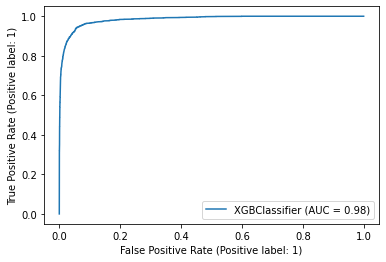

Train AUC 0.9997393045791395
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32518
           1       0.99      0.99      0.99      9755

    accuracy                           1.00     42273
   macro avg       0.99      0.99      0.99     42273
weighted avg       1.00      1.00      1.00     42273



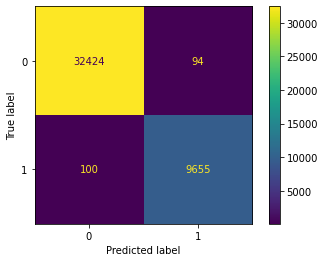

Test AUC 0.9840626691282242
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     16016
           1       0.89      0.80      0.84      1964

    accuracy                           0.97     17980
   macro avg       0.93      0.89      0.91     17980
weighted avg       0.97      0.97      0.97     17980



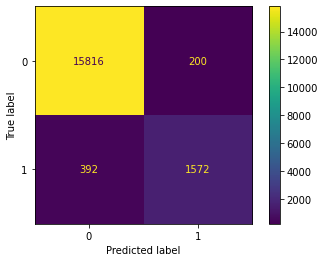

In [14]:
metrics(xgb_model, X_train_smote, X_test, y_train_smote, y_test, thr=0.5)

In [ ]:
scores = cross_val_score(xgb_model, X_train_smote, y_train_smote, cv=3) #cv=5
print("Mean cross-validation score: %.2f" % scores.mean())
#Mean cross-validation score: 0.94


In [ ]:
kfold = KFold(n_splits=5, shuffle=True) #_splits=10
kf_cv_scores = cross_val_score(xgb_model, X_train_smote, y_train_smote, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())
#K-fold CV average score: 0.94 

In [17]:
ypred = xgb_model.predict_proba(X_test)
ypred

array([[8.9486098e-01, 1.0513905e-01],
       [9.9927008e-01, 7.2993618e-04],
       [9.7143286e-01, 2.8567122e-02],
       ...,
       [9.9221706e-01, 7.7829110e-03],
       [9.9896467e-01, 1.0353433e-03],
       [9.8651397e-01, 1.3486039e-02]], dtype=float32)

In [15]:
fh = open('m_XGBoost_PCA_vfinal.pkl','wb') #guardamos modelo en archivo pickle
pickle.dump(xgb_model,fh)
fh.close()

In [5]:
#X_train_smote = np.array(X_train_smote)
#y_train_smote = np.array(y_train_smote)

In [5]:
dtrain = xgb.DMatrix(X_train_smote, y_train_smote)
dtest = xgb.DMatrix(X_test, y_test)

In [12]:
dtrain.feature_names

['Rubro1_Equipos y suministros de defensa, orden público, protección y seguridad',
 'Rubro2_Materiales estructurales básicos',
 'Rubro1_Artículos de fabricación y producción',
 'Rubro3_Filtros',
 'Rubro1_Ropa, maletas y productos de aseo personal',
 'Rubro2_Vestuario clínico',
 'Rubro1_Maquinaria para fabricación y transformación industrial',
 'Rubro3_Maquinaria para soldadura directa o indirecta',
 'Rubro2_Herramientas manuales',
 'Rubro2_Cintas adhesivas y selladores',
 'Rubro2_Filtros y purificación industrial',
 'Rubro3_Cerraduras, elementos de seguridad y accesorios',
 'nombre_producto_Discos de acabado o pulido',
 'Rubro3_Metales base',
 'Rubro3_Rellenos y acabados dentales y suministros para pulir',
 'Rubro3_Llaves, destornilladores y guías',
 'nombre_producto_Discos',
 'Rubro2_Minerales y metales',
 'Rubro2_Maquinaria y suministros para talleres',
 'Rubro1_Medicamentos y productos farmacéuticos',
 'nombre_producto_Brocas',
 'nombre_producto_Vestuario',
 'Rubro2_Equipos para ord

In [7]:
dtrain.feature_types

['int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'float',
 'float',
 'float',
 'float',
 'float',
 'float',
 'float',
 'float',
 'float',
 'floa

In [13]:
dtrain.get_label()

array([0., 0., 0., ..., 1., 1., 1.], dtype=float32)

In [14]:
##### los mejores parámetros hasta el momento
params={ 'base_score': 0.5, # prediccion inicial
     #'booster': ['gbtree'],# (gbtree, gblinear, dart) default=gbtree
     'colsample_bylevel': 1,
     'colsample_bytree': 0.8, #aletoreidad en selección de columnas de cada arbol
     'learning_rate': 0.05, # [0.05,0.1,0.01]  muy relacionado con el numero de estimadores, preferible learning rate bajo 0.01 y 1000 estimadores por ejemplo
     'max_depth': 6, #[2,3,4] [4,5,6]
     #'max_leaves': [0,5], #[5,10]
     'min_child_weight': 1, # minimo numero samples por hoja
     #'missing': [np.nan], # si queremos reemplazar los missings por un numero
     'n_estimators': 500, # [100,500] 100 es valor default de numero de arboles [100,150,200,250,300,350,400]
     'n_jobs': -1, # trabajos en paralelo
     #'predictor': ['gpu_predictor'], #default=auto --- Prediction using GPU. Used when tree_method is gpu_hist. only recommended for performing prediction tasks.
     'random_state': 0, # seed para generar los folds
     'reg_alpha': 0.01, # L1 regularitacion
     'reg_lambda': 0.01, # L2 regularitacion
     'scale_pos_weight': 1,
     #'tree_method': ['gpu_hist'], #default=auto ['gpu_hist'] utiliza gpu
     'subsample': 0.9} # ratio de muestras por cada arbol 

num_round = 150

In [15]:
model = xgb.train(params, dtrain, num_round)

[12:34:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [16]:
model.best_iteration

149

In [17]:
model.num_features()

10113

In [23]:
model.attributes()

{'best_iteration': '149', 'best_ntree_limit': '150'}

In [24]:
model.get_fscore() # Get feature importance of each feature.

{'Rubro1_Equipos y suministros de defensa, orden público, protección y seguridad': 83.0,
 'Rubro2_Materiales estructurales básicos': 48.0,
 'Rubro1_Artículos de fabricación y producción': 60.0,
 'Rubro3_Filtros': 46.0,
 'Rubro1_Ropa, maletas y productos de aseo personal': 50.0,
 'Rubro2_Vestuario clínico': 52.0,
 'Rubro1_Maquinaria para fabricación y transformación industrial': 48.0,
 'Rubro3_Maquinaria para soldadura directa o indirecta': 27.0,
 'Rubro2_Herramientas manuales': 32.0,
 'Rubro2_Cintas adhesivas y selladores': 29.0,
 'Rubro2_Filtros y purificación industrial': 7.0,
 'Rubro3_Cerraduras, elementos de seguridad y accesorios': 42.0,
 'nombre_producto_Discos de acabado o pulido': 33.0,
 'Rubro3_Metales base': 31.0,
 'Rubro3_Rellenos y acabados dentales y suministros para pulir': 2.0,
 'Rubro3_Llaves, destornilladores y guías': 15.0,
 'nombre_producto_Discos': 19.0,
 'Rubro2_Minerales y metales': 3.0,
 'Rubro2_Maquinaria y suministros para talleres': 7.0,
 'Rubro1_Medicamentos 

In [19]:
'''Get feature importance of each feature. For tree model Importance type can be defined as:
‘weight’: the number of times a feature is used to split the data across all trees.
‘gain’: the average gain across all splits the feature is used in.
‘cover’: the average coverage across all splits the feature is used in.
‘total_gain’: the total gain across all splits the feature is used in.
‘total_cover’: the total coverage across all splits the feature is used in.'''
model.get_score() 

{'Rubro1_Equipos y suministros de defensa, orden público, protección y seguridad': 83.0,
 'Rubro2_Materiales estructurales básicos': 48.0,
 'Rubro1_Artículos de fabricación y producción': 60.0,
 'Rubro3_Filtros': 46.0,
 'Rubro1_Ropa, maletas y productos de aseo personal': 50.0,
 'Rubro2_Vestuario clínico': 52.0,
 'Rubro1_Maquinaria para fabricación y transformación industrial': 48.0,
 'Rubro3_Maquinaria para soldadura directa o indirecta': 27.0,
 'Rubro2_Herramientas manuales': 32.0,
 'Rubro2_Cintas adhesivas y selladores': 29.0,
 'Rubro2_Filtros y purificación industrial': 7.0,
 'Rubro3_Cerraduras, elementos de seguridad y accesorios': 42.0,
 'nombre_producto_Discos de acabado o pulido': 33.0,
 'Rubro3_Metales base': 31.0,
 'Rubro3_Rellenos y acabados dentales y suministros para pulir': 2.0,
 'Rubro3_Llaves, destornilladores y guías': 15.0,
 'nombre_producto_Discos': 19.0,
 'Rubro2_Minerales y metales': 3.0,
 'Rubro2_Maquinaria y suministros para talleres': 7.0,
 'Rubro1_Medicamentos 

In [ ]:
model.predict_proba(X, ntree_limit=None, validate_features=True, base_margin=None, iteration_range=None)
'''
Parameters
X (array_like) – Feature matrix.
ntree_limit (int) – Deprecated, use iteration_range instead.
validate_features (bool) – When this is True, validate that the Booster’s and data’s feature_names are identical. Otherwise, it is assumed that the feature_names are the same.
base_margin (array_like) – Margin added to prediction.
iteration_range (Optional[Tuple[int, int]]) – Specifies which layer of trees are used in prediction. For example, if a random forest is trained with 100 rounds. Specifying iteration_range=(10, 20), then only the forests built during [10, 20) (half open set) rounds are used in this prediction.

Returns
a numpy array of shape array-like of shape (n_samples, n_classes) with the probability of each data example being of a given class.'''

In [20]:
y_pred_probab = model.predict(dtest)

auc = roc_auc_score(y_test, y_pred_probab)
aps = average_precision_score(y_test, y_pred_probab)

print(auc)
print(aps)

0.9814721691757005
0.9070351685156554


In [ ]:
#### solo para sklearn
model.predict_proba(dtest)

Test AUROC 0.9814721691757005
Classification report with Threshold=0.5
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     16123
           1       0.86      0.82      0.84      1978

    accuracy                           0.97     18101
   macro avg       0.92      0.90      0.91     18101
weighted avg       0.97      0.97      0.97     18101



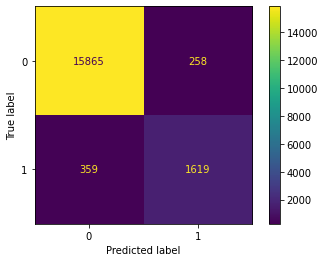

In [21]:
y_pred= (y_pred_probab>0.5)*1
print('Test AUROC',auc)
print('Classification report with Threshold=0.5')
print(classification_report(y_test,y_pred,target_names=['0','1']))
cm = confusion_matrix(y_test,y_pred) #Matriz
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

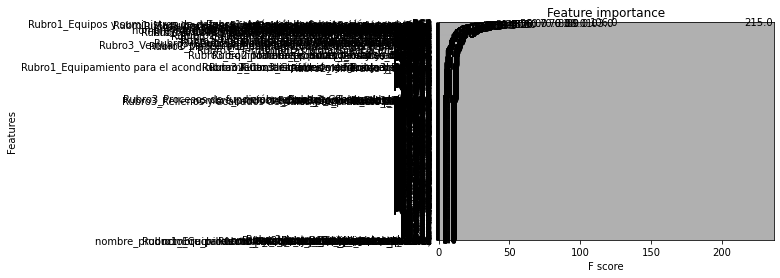

In [22]:
xgb.plot_importance(model)

In [ ]:
xgb.plot_tree(model)

In [ ]:
xgb.to_graphviz(model)

In [32]:
#os.chdir('Datos')
#os.chdir('../')
#os.chdir('Modelos')
os.chdir('../Modelos')
os.getcwd()

'c:\\Users\\metal\\Trabajos Bootcamp\\Proyecto Final\\juanito_v2.0\\Modelos'

In [26]:
#### guardar modelo en pickle
fh = open('m_XGBoost_PCA_v5.pkl','wb')
pickle.dump(model,fh)
fh.close()

In [ ]:
#### guardar modelo en archivo JSON
#model.save_model(fname, fmap='', with_stats=False, dump_format='json')
model.save_model("m_XGBoost_v5.json")
# dump_model(fname)

In [42]:
model.num_features()

10113

In [43]:
#### cargar modelo archivo jason
temp= xgb.Booster()
temp.load_model('m_XGBoost_v5.json')
temp.num_features()

10113

In [41]:
type(temp)

xgboost.core.Booster

### Resultados 6 iteración utilizando GridSearch

In [ ]:
##### versión de varios candidatos, mi equipo solo permite 3 utilizando memoria RAM
params={ 'base_score': [0.5], # prediccion inicial
     #'booster': ['gbtree'],# (gbtree, gblinear, dart) default=gbtree
     'colsample_bylevel': [1],
     'colsample_bytree': [0.8], #aletoreidad en selección de columnas de cada arbol
     'learning_rate': [0.05], # [0.05,0.1,0.01]  muy relacionado con el numero de estimadores, preferible learning rate bajo 0.01 y 1000 estimadores por ejemplo
     'max_depth': [4,6], #[2,3,4] [4,5,6]
     #'max_leaves': [0,5], #[5,10]
     'min_child_weight': [1], # minimo numero samples por hoja
     #'missing': [np.nan], # si queremos reemplazar los missings por un numero
     'n_estimators': [100], # [100,500] 100 es valor default de numero de arboles [100,150,200,250,300,350,400]
     'n_jobs': [-1], # trabajos en paralelo
     #'predictor': ['gpu_predictor'], #default=auto --- Prediction using GPU. Used when tree_method is gpu_hist. only recommended for performing prediction tasks.
     'random_state': [0], # seed para generar los folds
     'reg_alpha': [0.01], # L1 regularitacion
     'reg_lambda': [0.01], # L2 regularitacion
     'scale_pos_weight': [1],
     #'tree_method': ['gpu_hist'], #default=auto ['gpu_hist'] utiliza gpu
     'subsample': [0.9]} # ratio de muestras por cada arbol 

In [9]:
results_cv=model_result_xgboost.cv_results_
results=pd.DataFrame(results_cv)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_base_score,param_colsample_bylevel,param_colsample_bytree,param_learning_rate,param_max_depth,param_min_child_weight,...,param_reg_lambda,param_scale_pos_weight,param_subsample,params,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc
0,5103.547629,134.571795,26.277997,10.214105,0.5,1,0.8,0.05,4,1,...,0.01,1,0.9,"{'base_score': 0.5, 'colsample_bylevel': 1, 'c...",0.959360,0.968947,0.975112,0.967806,0.006481,2
1,5678.290452,51.942058,16.448121,1.128203,0.5,1,0.8,0.05,6,1,...,0.01,1,0.9,"{'base_score': 0.5, 'colsample_bylevel': 1, 'c...",0.972429,0.979735,0.984869,0.979011,0.005104,1


In [10]:
model_result_xgboost.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0.01, reg_lambda=0.01, ...)

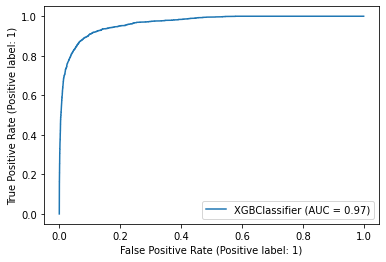

Train AUC 0.9877163150673188
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     31010
           1       0.95      0.84      0.89      9303

    accuracy                           0.95     40313
   macro avg       0.95      0.91      0.93     40313
weighted avg       0.95      0.95      0.95     40313



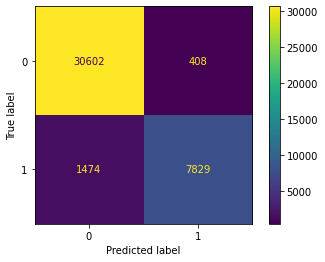

Test AUC 0.9654489594414308
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     15260
           1       0.81      0.71      0.76      1784

    accuracy                           0.95     17044
   macro avg       0.89      0.85      0.87     17044
weighted avg       0.95      0.95      0.95     17044



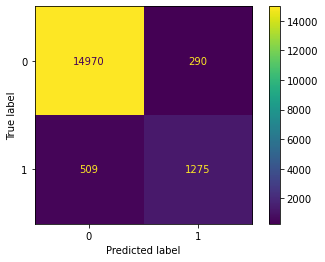

In [11]:
metrics(model_result_xgboost.best_estimator_, X_train_smote, X_test, y_train_smote, y_test, thr=0.5)

In [7]:
#os.chdir(r'C:\Users\metal\Trabajos Bootcamp\Proyecto Final\juanito_v2.0\Modelos')
os.chdir('../')
os.chdir('Modelos')
os.getcwd()

'c:\\Users\\metal\\Trabajos Bootcamp\\Proyecto Final\\juanito_v2.0\\Modelos'

In [13]:
fh = open('m_XGBoost_PCA_v4','wb')
#fh = open('df_smote30_train_test(redux).pkl','wb')
pickle.dump(model_result_xgboost,fh)
fh.close()

### Resultados 5 iteración

In [ ]:
##### versión de varios candidatos, mi equipo solo permite 3 utilizando memoria RAM
params={ 'base_score': [0.5], # prediccion inicial
     #'booster': ['gbtree'],# (gbtree, gblinear, dart) default=gbtree
     'colsample_bylevel': [1],
     'colsample_bytree': [0.8], #aletoreidad en selección de columnas de cada arbol
     'learning_rate': [0.05], # [0.05,0.1,0.01]  muy relacionado con el numero de estimadores, preferible learning rate bajo 0.01 y 1000 estimadores por ejemplo
     'max_depth': [4], #[2,3,4] [4,5,6]
     #'max_leaves': [0,5], #[5,10]
     'min_child_weight': [1], # minimo numero samples por hoja
     #'missing': [np.nan], # si queremos reemplazar los missings por un numero
     'n_estimators': [100,500], # [100,500] 100 es valor default de numero de arboles [100,150,200,250,300,350,400]
     'n_jobs': [-1], # trabajos en paralelo
     #'predictor': ['gpu_predictor'], #default=auto --- Prediction using GPU. Used when tree_method is gpu_hist. only recommended for performing prediction tasks.
     'random_state': [0], # seed para generar los folds
     'reg_alpha': [0.01], # L1 regularitacion
     'reg_lambda': [0.01], # L2 regularitacion
     'scale_pos_weight': [1],
     #'tree_method': ['gpu_hist'], #default=auto ['gpu_hist'] utiliza gpu
     'subsample': [0.9]} # ratio de muestras por cada arbol 

In [30]:
results_cv=model_result_xgboost.cv_results_
results=pd.DataFrame(results_cv)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_base_score,param_colsample_bylevel,param_colsample_bytree,param_learning_rate,param_max_depth,param_min_child_weight,...,param_reg_lambda,param_scale_pos_weight,param_subsample,params,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc
0,5167.073905,35.639344,24.342004,4.786176,0.5,1,0.8,0.05,4,1,...,0.01,1,0.9,"{'base_score': 0.5, 'colsample_bylevel': 1, 'c...",0.960837,0.969944,0.973237,0.968006,0.005245,2
1,16874.396545,1423.178192,18.572857,5.745100,0.5,1,0.8,0.05,4,1,...,0.01,1,0.9,"{'base_score': 0.5, 'colsample_bylevel': 1, 'c...",0.981924,0.990718,0.993066,0.988569,0.004796,1


In [32]:
model_result_xgboost.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0.01, reg_lambda=0.01, ...)

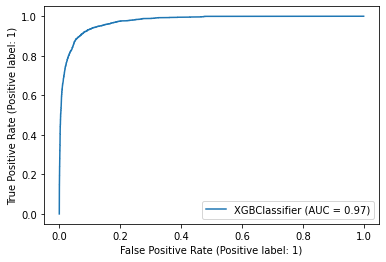

Train AUC 0.9973535789583989
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     31010
           1       0.97      0.95      0.96      9303

    accuracy                           0.98     40313
   macro avg       0.98      0.97      0.97     40313
weighted avg       0.98      0.98      0.98     40313



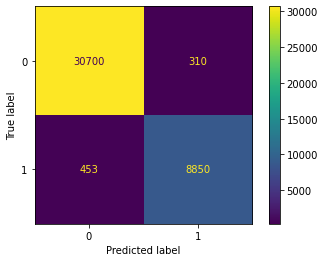

Test AUC 0.9743793123967817
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     15260
           1       0.82      0.74      0.78      1784

    accuracy                           0.96     17044
   macro avg       0.89      0.86      0.88     17044
weighted avg       0.95      0.96      0.95     17044



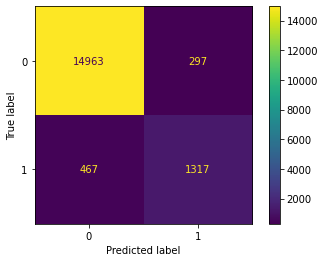

In [31]:
metrics(model_result_xgboost.best_estimator_, X_train_smote, X_test, y_train_smote, y_test, thr=0.5)

In [33]:
#os.chdir(r'C:\Users\metal\Trabajos Bootcamp\Proyecto Final\juanito_v2.0\Modelos')
os.chdir('../')
os.chdir('Modelos')
os.getcwd()

'C:\\Users\\metal\\Trabajos Bootcamp\\Proyecto Final\\juanito_v2.0\\Modelos'

In [34]:
fh = open('m_XGBoost_PCA_v3','wb')
#fh = open('df_smote30_train_test(redux).pkl','wb')
pickle.dump(model_result_xgboost,fh)
fh.close()

### Resultados 4ta iteración

In [ ]:
##### versión de varios candidatos, mi equipo solo permite 3 utilizando memoria RAM
params={ 'base_score': [0.5], # prediccion inicial
     #'booster': ['gbtree'],# (gbtree, gblinear, dart) default=gbtree
     'colsample_bylevel': [1],
     'colsample_bytree': [0.8], #aletoreidad en selección de columnas de cada arbol
     'learning_rate': [0.05], # [0.05,0.1,0.01]  muy relacionado con el numero de estimadores, preferible learning rate bajo 0.01 y 1000 estimadores por ejemplo
     'max_depth': [2,3,4], #[2,3,4] [4,5,6]
     #'max_leaves': [0,5], #[5,10]
     'min_child_weight': [1], # minimo numero samples por hoja
     #'missing': [np.nan], # si queremos reemplazar los missings por un numero
     'n_estimators': [100], # [100,500] 100 es valor default de numero de arboles [100,150,200,250,300,350,400]
     'n_jobs': [-1], # trabajos en paralelo
     #'predictor': ['gpu_predictor'], #default=auto --- Prediction using GPU. Used when tree_method is gpu_hist. only recommended for performing prediction tasks.
     'random_state': [0], # seed para generar los folds
     'reg_alpha': [0.01], # L1 regularitacion
     'reg_lambda': [0.01], # L2 regularitacion
     'scale_pos_weight': [1],
     #'tree_method': ['gpu_hist'], #default=auto ['gpu_hist'] utiliza gpu
     'subsample': [0.9]} # ratio de muestras por cada arbol 

In [27]:
model_result_xgboost.best_params_

{'base_score': 0.5,
 'colsample_bylevel': 1,
 'colsample_bytree': 0.8,
 'learning_rate': 0.05,
 'max_depth': 4,
 'min_child_weight': 1,
 'n_jobs': -1,
 'random_state': 0,
 'reg_alpha': 0.01,
 'reg_lambda': 0.01,
 'scale_pos_weight': 1,
 'subsample': 0.9}

In [28]:
model_result_xgboost.cv_results_

{'mean_fit_time': array([2600.61831212, 3223.84113348, 3448.41549671]),
 'std_fit_time': array([328.87866902,  59.42346442,  62.57965052]),
 'mean_score_time': array([101.2131778 ,  38.88206875,  34.0226016 ]),
 'std_score_time': array([29.12381828, 11.23477924,  1.1862638 ]),
 'param_base_score': masked_array(data=[0.5, 0.5, 0.5],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'param_colsample_bylevel': masked_array(data=[1, 1, 1],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'param_colsample_bytree': masked_array(data=[0.8, 0.8, 0.8],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'param_learning_rate': masked_array(data=[0.05, 0.05, 0.05],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[2, 3, 4],
              mask=[False, False, False],
        fill_value

In [29]:
os.getcwd()

'C:\\Users\\metal\\Trabajos Bootcamp\\Proyecto Final\\juanito_v2.0\\Modelos'

In [ ]:
#os.chdir(r'C:\Users\metal\Trabajos Bootcamp\Proyecto Final\juanito_v2.0\Modelos')
os.chdir('../')
os.chdir('Modelos')
os.getcwd()

'C:\\Users\\metal\\Trabajos Bootcamp\\Proyecto Final\\juanito_v2.0\\Modelos'

In [30]:
fh = open('m_XGBoost_PCA_v2','wb')
#fh = open('df_smote30_train_test(redux).pkl','wb')
pickle.dump(model_result_xgboost,fh)
fh.close()

### Resultados primera iteración (incorrecto aplicación de smote sobre muetra para test)

In [ ]:
#Ahora todos los modelos los usamos con la data train para obtener las probabilidades
y_pred = model_result_xgboost.predict(X_train)
probs = model_result_xgboost.predict_proba(X_train)
print('Train AUC:', roc_auc_score(y_train,probs[:,1]))

#Ahora evaluo el resultado con la data de test
y_pred = model_result_xgboost.predict(X_test)
probs = model_result_xgboost.predict_proba(X_test)
print(" Test AUC:", roc_auc_score(y_test,probs[:,1]))

Train AUC: 0.9630412048830986
 Test AUC: 0.9621369872399149


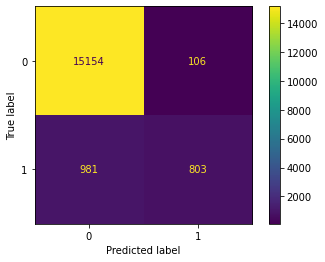

In [ ]:
#plot_confusion_matrix(model_result,  X_test, y_test) funcion deprecada en futuras versiones
cm = confusion_matrix(y_test,y_pred)
disp =ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_result_xgboost.classes_)
disp.plot()
plt.show()

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(y_test, probs[:,1])
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

0.9534261331244968


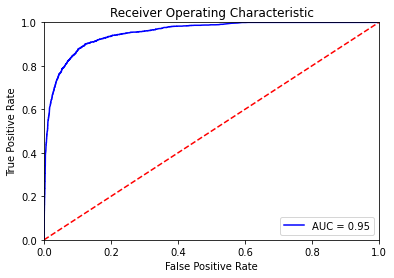

In [ ]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
print(classification_report(y_test,y_pred,target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     15260
           1       0.88      0.45      0.60      1784

    accuracy                           0.94     17044
   macro avg       0.91      0.72      0.78     17044
weighted avg       0.93      0.94      0.93     17044



### si queremos retomar algun modelo ya entrenado para analizar sus metricas

In [96]:
#os.chdir(r'C:\Users\metal\Trabajos Bootcamp\Proyecto Final\juanito_v2.0\Modelos')
#os.chdir('../')
#os.chdir('Modelos')
os.getcwd()

'c:\\Users\\metal\\Trabajos Bootcamp\\Proyecto Final'

In [6]:
fh1=open('m_XGBoost_PCA_v2.pkl','rb')
train_test=pickle.load(fh1)
fh1.close()

FileNotFoundError: [Errno 2] No such file or directory: 'm_XGBoost_PCA_v2.pkl'

In [31]:
results_cv=model_result_xgboost.cv_results_
results=pd.DataFrame(results_cv)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_base_score,param_colsample_bylevel,param_colsample_bytree,param_learning_rate,param_max_depth,param_min_child_weight,...,param_reg_alpha,param_reg_lambda,param_scale_pos_weight,param_subsample,params,split0_test_roc_auc,split1_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc
0,2600.618312,328.878669,101.213178,29.123818,0.5,1,0.8,0.05,2,1,...,0.01,0.01,1,0.9,"{'base_score': 0.5, 'colsample_bylevel': 1, 'c...",0.937400,0.951163,0.944281,0.006882,3
1,3223.841133,59.423464,38.882069,11.234779,0.5,1,0.8,0.05,3,1,...,0.01,0.01,1,0.9,"{'base_score': 0.5, 'colsample_bylevel': 1, 'c...",0.952633,0.964321,0.958477,0.005844,2
2,3448.415497,62.579651,34.022602,1.186264,0.5,1,0.8,0.05,4,1,...,0.01,0.01,1,0.9,"{'base_score': 0.5, 'colsample_bylevel': 1, 'c...",0.961567,0.971961,0.966764,0.005197,1


In [ ]:
sns.relplot(x="param_max_depth",
            y="std_test_roc_auc",
            #style="param_max_features",
            #hue="param_min_impurity_decrease",
            kind = "line",
            palette=["r", "b"],
            height=3, linewidth=3, data=results)

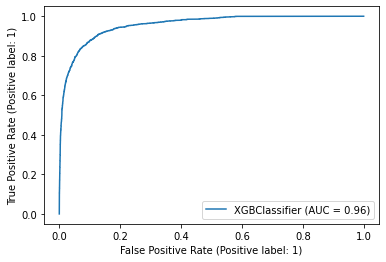

Train AUC 0.972152701813672
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     31010
           1       0.92      0.72      0.81      9303

    accuracy                           0.92     40313
   macro avg       0.92      0.85      0.88     40313
weighted avg       0.92      0.92      0.92     40313



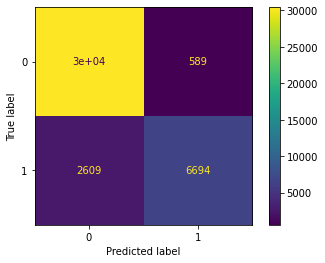

Test AUC 0.9563832471833511
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     15260
           1       0.80      0.65      0.72      1784

    accuracy                           0.95     17044
   macro avg       0.88      0.82      0.84     17044
weighted avg       0.94      0.95      0.94     17044



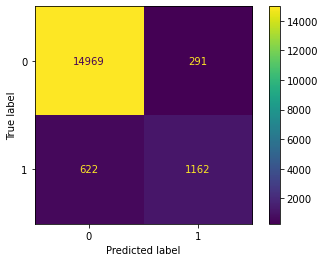

In [32]:
metrics(model_result_xgboost.best_estimator_, X_train_smote, X_test, y_train_smote, y_test, thr=0.5)

## Análisis errores

In [12]:
fh1 = open('m_XGBoost_PCA_v5.pkl','rb')
xgb_model = pickle.load(fh1)
fh1.close()

In [13]:
xgb_model.num_features()

10113

In [14]:
xgb_model.attributes()

{'best_iteration': '149', 'best_ntree_limit': '150'}

In [15]:
dtrain = xgb.DMatrix(X_train_smote, y_train_smote)
dtest = xgb.DMatrix(X_test, y_test)

In [ ]:
xgb_model.predict(dtest, output_margin=False, ntree_limit=0, pred_leaf=False, 
        pred_contribs=False, approx_contribs=False, pred_interactions=False, 
        validate_features=True, training=False, iteration_range=(0, 0), strict_shape=False)


In [70]:
len(xgb_model.predict(dtest))

18101

In [73]:
type(y_test.index)

pandas.core.indexes.base.Index

In [16]:
y_pred = pd.DataFrame(xgb_model.predict(dtest))
y_pred.rename(columns={0:'y_pred'},inplace=True)
y_pred.index = y_test.index
y_pred

,y_pred
id_producto,
3568-84-L121-1,0.432484
1058012-53-LR21-2,-0.009524
3540-118-LE21-4,0.070256
3017-186-L121-4,0.051088
3349-54-L121-1,0.175207
...,...
1078779-19-L121-10,0.168945
1057432-68-L121-1,0.024087
855-17-LP21-3,0.046650


In [17]:
os.getcwd()

'c:\\Users\\metal\\Trabajos Bootcamp\\Proyecto Final\\juanito_v2.0\\Modelos'

In [18]:
fh2=open('..\Datos\df_nltk.pkl','rb')
df=pickle.load(fh2)
fh2.close()
df.head()

,descripcion,label,Descripcion limpia,Descripcion raiz limpia
id_producto,,,,
2792-88-LE21-1,CÁMARA RETINAL NO MIDRIÁTICA - ESPECIFICACIONE...,0,camara retinal midriatica especificaciones bas...,cam retinal midriat especif bas tecnic
1704-52-LP21-1,SERVICIO DE MUDANZA DE ENSERES PROPIOS Y EN US...,0,servicio mudanza enseres propios hospital mart...,servici mudanz enser propi hospital martin qui...
1003-20-L121-1,LEÑA SECA CERTIFICADA,0,leña seca certificada,leñ sec certific
4236-21-L121-1,MARCADOR BLANCO PARA METALES,0,marcador blanco metales,marcador blanc metal
4236-21-L121-2,PLOMADA,0,plomada,plom


In [100]:
df[['Descripcion limpia','Descripcion raiz limpia']]

,Descripcion limpia,Descripcion raiz limpia
id_producto,,
2792-88-LE21-1,camara retinal midriatica especificaciones bas...,cam retinal midriat especif bas tecnic
1704-52-LP21-1,servicio mudanza enseres propios hospital mart...,servici mudanz enser propi hospital martin qui...
1003-20-L121-1,leña seca certificada,leñ sec certific
4236-21-L121-1,marcador blanco metales,marcador blanc metal
4236-21-L121-2,plomada,plom
...,...,...
1058141-35-LQ21-1,alteplasa caja,alteplas caj
1058141-35-LQ21-4,tenecteplasa,tenecteplas
1173455-12-LE21-41,manguera transparente nivel,manguer transparent nivel


In [19]:
print(data.shape,df[['Descripcion limpia','Descripcion raiz limpia']].shape)
dferror=pd.merge(data, df[['Descripcion limpia','Descripcion raiz limpia']], left_index=True, right_index=True)
#dferror=pd.concat([df, y_test], axis=1)
dferror.shape

(54484, 7) (54484, 2)


(54484, 9)

In [20]:
dferror.head()

,id_licitacion,Rubro1,Rubro2,Rubro3,nombre_producto,descripcion,label,Descripcion limpia,Descripcion raiz limpia
id_producto,,,,,,,,,
2792-88-LE21-1,2792-88-LE21,Equipamiento y suministros médicos,Productos quirúrgicos,"Equipo quirúrgico, accesorios y productos rela...",Equipo quirúrgico de fragmatome retinal vítreo...,CÁMARA RETINAL NO MIDRIÁTICA - ESPECIFICACIONE...,0,camara retinal midriatica especificaciones bas...,cam retinal midriat especif bas tecnic
1704-52-LP21-1,1704-52-LP21,"Servicios de transporte, almacenaje y correo",Transporte de correo y carga,Transporte de carga por carretera,Servicios de transporte local en camión,SERVICIO DE MUDANZA DE ENSERES PROPIOS Y EN US...,0,servicio mudanza enseres propios hospital mart...,servici mudanz enser propi hospital martin qui...
1003-20-L121-1,1003-20-L121,"Productos derivados de minerales, plantas y an...",Chatarra y desechos no metálicos,Desechos no metálicos,Desperdicios o restos de madera,LEÑA SECA CERTIFICADA,0,leña seca certificada,leñ sec certific
4236-21-L121-1,4236-21-L121,"Equipos, accesorios y suministros de oficina",Suministros de oficina,Instrumentos de escritura,Marcadores,MARCADOR BLANCO PARA METALES,0,marcador blanco metales,marcador blanc metal
4236-21-L121-2,4236-21-L121,Herramientas y maquinaria en general,Herramientas manuales,Herramientas de medición y trazado,Péndulos,PLOMADA,0,plomada,plom


In [21]:
print(data.shape,y_pred.shape)
dferror=pd.merge(dferror, y_pred, left_index=True, right_index=True)
dferror.shape

(54484, 7) (17980, 1)


(17980, 10)

In [22]:
dferror.head()

,id_licitacion,Rubro1,Rubro2,Rubro3,nombre_producto,descripcion,label,Descripcion limpia,Descripcion raiz limpia,y_pred
id_producto,,,,,,,,,,
1704-52-LP21-1,1704-52-LP21,"Servicios de transporte, almacenaje y correo",Transporte de correo y carga,Transporte de carga por carretera,Servicios de transporte local en camión,SERVICIO DE MUDANZA DE ENSERES PROPIOS Y EN US...,0,servicio mudanza enseres propios hospital mart...,servici mudanz enser propi hospital martin qui...,0.015465
4236-21-L121-2,4236-21-L121,Herramientas y maquinaria en general,Herramientas manuales,Herramientas de medición y trazado,Péndulos,PLOMADA,0,plomada,plom,0.138601
4236-21-L121-4,4236-21-L121,Equipos y suministros de limpieza,Suministros de limpieza,"Escobas, traperos, cepillos y accesorios",Escobillones,ESCOBILLON DE ASEO MUNICIPAL,0,escobillon aseo municipal,escobillon ase municipal,0.048845
4236-21-L121-9,4236-21-L121,"Equipos, accesorios y suministros de oficina",Suministros de oficina,Instrumentos de escritura,Lápices de madera,CAJA LAPIZ CARPINTERO,0,caja lapiz carpintero,caj lapiz carpinter,0.152093
3021-77-L121-22,3021-77-L121,"Equipos, accesorios y suministros de oficina",Suministros de oficina,Carpetas de archivo y separadores,Carpetas para archivos,CARPETA PLASTIFICADA CON ACCOCLIP ARCHIVADOR O...,0,carpeta plastificada accoclip archivador oficio,carpet plastific accoclip archiv ofici,0.025339


In [23]:
#### analizamos los falsos positivos con threshold mayor a 0.9
df_FP = dferror[(dferror['label']==0) & (dferror['y_pred'] >= 0.9) ]
print(df_FP.shape)
df_FP.head()

(16, 10)


,id_licitacion,Rubro1,Rubro2,Rubro3,nombre_producto,descripcion,label,Descripcion limpia,Descripcion raiz limpia,y_pred
id_producto,,,,,,,,,,
2273-399-L121-6,2273-399-L121,"Equipos y suministros de defensa, orden públic...",Misiles,Subsistemas de misiles,Tiradores de pestillos de seguridad,picaportes base ancha 2”,0,picaportes base ancha,picaport bas ancha,0.902415
3759-91-L121-3,3759-91-L121,"Equipos y suministros de defensa, orden públic...",Seguridad y control público,Control de tráfico,Delimitadores o conos de tráfico,SET DE 20 CONOS DEPORTIVOS PARA ENTRENAMIENTO,0,conos deportivos entrenamiento,con deport entren,0.904278
3385-31-L121-8,3385-31-L121,"Equipos y suministros de defensa, orden públic...",Seguridad y control público,Control de tráfico,Delimitadores o conos de tráfico,Set de 20unidades de conos de agilidad para en...,0,unidades conos agilidad entrenamiento lentejas...,unidad con agil entren lentej diferent color,0.900159
2274-105-L121-2,2274-105-L121,"Equipos y suministros de defensa, orden públic...",Protección contra incendios,Equipos para combatir incendios,Extintores,Servicio de mantención para equipo extintor de...,0,servicio mantencion equipo extintor incendio p...,servici mantencion equip extintor incendi polv...,0.960858
2274-105-L121-3,2274-105-L121,"Equipos y suministros de defensa, orden públic...",Protección contra incendios,Equipos para combatir incendios,Extintores,Servicio de mantención para equipo extintor de...,0,servicio mantencion equipo extintor incendio p...,servici mantencion equip extintor incendi polv...,0.960858


In [25]:
#### analizamos los falsos negativos con threshold mayor a 0.1
df_FN = dferror[(dferror['label']==1) & (dferror['y_pred'] <= 0.1) ]
print(df_FN.shape)
df_FN.head()

(59, 10)


,id_licitacion,Rubro1,Rubro2,Rubro3,nombre_producto,descripcion,label,Descripcion limpia,Descripcion raiz limpia,y_pred
id_producto,,,,,,,,,,
1079454-87-LE21-9,1079454-87-LE21,"Artículos para estructuras, obras y construcci...",Estructuras prefabricadas,Construcciones residenciales prefabricadas,Casas,Llana acero templado 280X130MM L280 mm,1,llana acero templado,llan acer templ,0.098797
3597-56-L121-1,3597-56-L121,Vehículos y equipamiento en general,Carrocerías y remolques,Remolques para carga,Remolques de transporte para automóviles,Se necesita adquirir Carro de Arrastre doble p...,1,necesita adquirir carro arrastre doble puente ...,necesit adquir carr arrastr dobl puent necesar...,0.093340
2427-100-L121-2,2427-100-L121,Equipamiento para manejo y estiba de materiales,Recipientes para almacenamiento,"Cofres, armarios y baúles para almacenaje",Cinturón para herramientas,Cinturón liniero más estrobo de amarre / upteck,1,cinturon liniero estrobo amarre upteck,cinturon linier estrob amarr upteck,0.026626
3409-15-L121-1,3409-15-L121,"Servicios de Viajes, alimentación, alojamiento...",Restaurantes y catering,Servicios de cafetería,Gestión de cafetería,"Contratación del servicio de ""Cafetería y alim...",1,contratacion servicio cafeteria alimentacion a...,contratacion servici cafeteri alimentacion aso...,0.022403
3825-75-L121-1,3825-75-L121,Vehículos y equipamiento en general,Embarcaciones,Componentes y accesorios para embarcaciones,Cabos de amarre,"COMPRA DE CABO DE VIDA Y ARNES, SEGÚN FICHA TÉ...",1,compra cabo vida arnes segun ficha tecnica adj...,compr cab vid arnes segun fich tecnic adjunt,0.039147
